# Script template for processing of REST-RECT simulations 

Run this script from the directory of your simulation, but not from subfolders of the individual replicas ... 

Load Gromacs & Plumed !!!

## Import modules

In [1]:
import packages

Invoking __init__.py for packages


In [2]:
dir(packages)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'glycan_conformer',
 'packages',
 'plot',
 'process_files']

In [5]:
help(packages.glycan_conformer)

Help on module packages.glycan_conformer in packages:

NAME
    packages.glycan_conformer

DESCRIPTION
    This module contains functions to generate N-glycan
    conformer strings from a COLVAR file containing
    torsion angle values recorded over a MD simulation.
    
    List of functions:
    create_binary
    find_min_max
    label_min
    load_dict
    perform_block_averages
    plot_distribution
    safe_dict

FUNCTIONS
    create_binary(maxima_dict, label_dict, colvar_dir, input_dir, colvar_length, features, loc1, loc2, loc3=None, loc4=None, loc5=None, loc6=None, locF=None, locG=None, bra3=None, bra4=None, bra5=None, bra6=None)
        Converts torsion angle values read from COVLAR file into IUPAC letters.
        
        Function that reads in a COLVAR file with torsion angle values stored 
        in each column and replaces each value by the corresponding IUPAC label, 
        which was previously defined in the label_dict.
        
        Parameters
        ----------
  

## 1. Check for replica exchange statistics 

Analysis script should only be used for REST simulation with an even replica number! The demuxing is done with a script demux.pl of Giovanni Bussi in order to allow for demuxing of long simulations. It prints the exchange probability and roundtrip time of each replica.

Check version of demux script?!

In [2]:
!cd Example_dataset/TOPO0 && ../../bash_scripts/exchange.sh 12 0.8

-----------------------------------------------------------------
Going to read a file containing the exchange information from
your mdrun log file (md.log).
This will produce a file (replica_index.xvg) suitable for
demultiplexing your trajectories using trjcat,
as well as a replica temperature file (replica_temp.xvg).
Each entry in the log file will be copied 0 times.
-----------------------------------------------------------------
Time step of the simulation (ps) = 0.002 There are 12 replicas.
Finished writing replica_index.xvg and replica_temp.xvg with 625000 lines
0  # Average round-trip time (ns): 20.742
1  # Average round-trip time (ns): 22.014
2  # Average round-trip time (ns): 30.8997
3  # Average round-trip time (ns): 38.2764
4  # Average round-trip time (ns): 19.9851
5  # Average round-trip time (ns): 23.1294
6  # Average round-trip time (ns): 32.1086
7  # Average round-trip time (ns): 27.1773
8  # Average round-trip time (ns): 24.7672
9  # Average round-trip time (ns): 30.5

## 2. Plot round-trip time

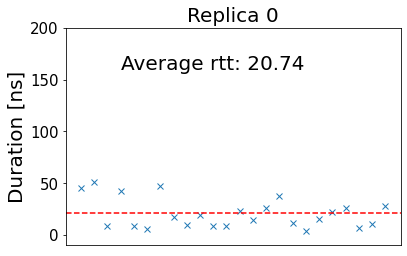

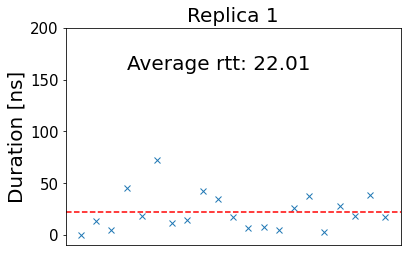

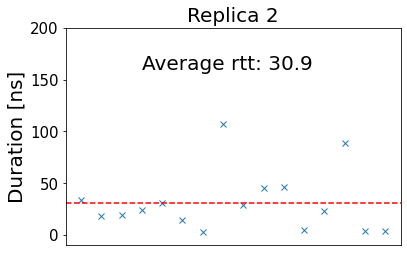

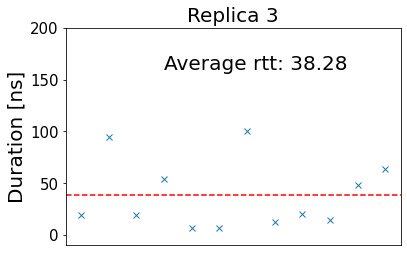

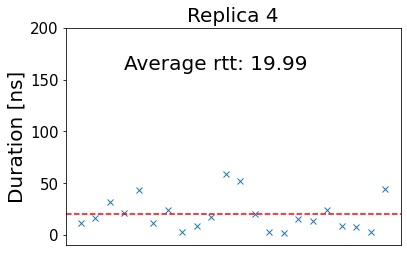

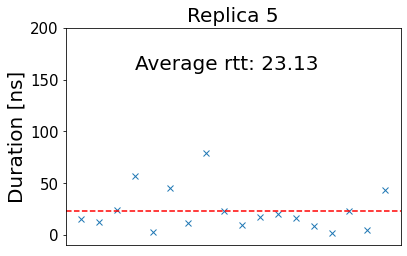

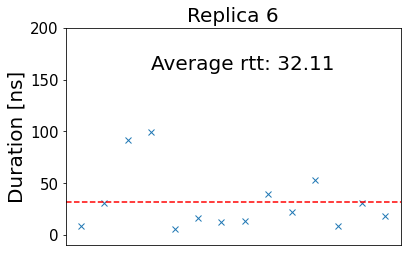

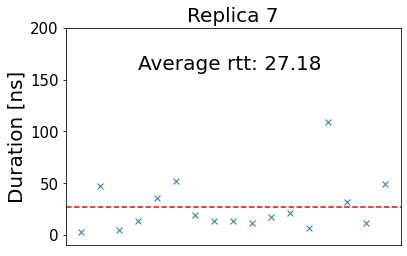

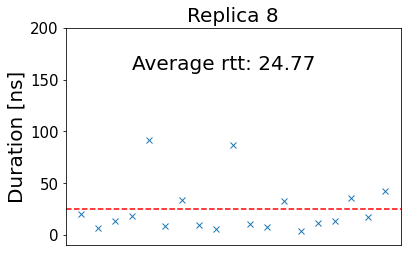

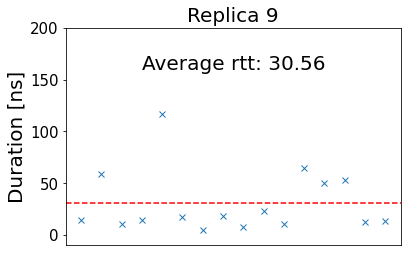

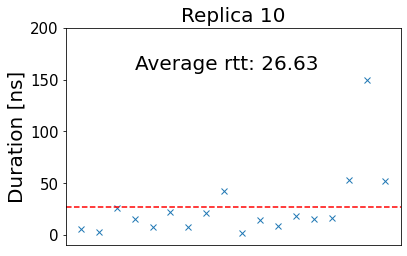

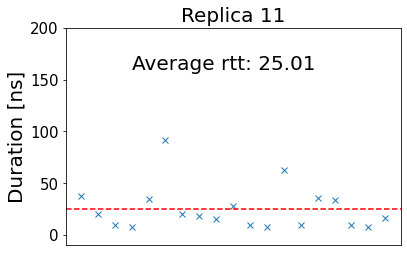

In [3]:
replica = 12 #Number of replicas
path = "Example_dataset/TOPO0"

packages.plot.roundtriptime(replica, path)

## 3. Construct free energy profiles by summing hills from replica 0 (unbiased)

A local Plumed executable is required to perform this step

In [4]:
features = ['phi1_2', 'psi1_2', 'phi2_3', 'psi2_3', 'phi3_8', 'psi3_8', 'omega3_8','phi8_9', 'psi8_9', 
            'phi9_10', 'psi9_10', 'phi10_11', 'psi10_11', 'omega10_11','phi3_4','psi3_4','phi4_5',
            'psi4_5', 'phi5_6', 'psi5_6', 'phi6_7', 'psi6_7', 'omega6_7']

import glob

for filen in glob.glob( "Example_dataset/TOPO0/HILLS_*.0") : 
    !ml foss && ml PLUMED && bash_scripts/sumhills.sh {filen} 1000 2.579
    !rm -rf {filen}_fes 
    !mkdir {filen}_fes 
    !mv fes_*.dat {filen}_fes

for f in features:
    packages.process_files.rename_profiles("Example_dataset/TOPO0/HILLS_{}.0_fes/".format(f))
    packages.process_files.shift_to_zero("Example_dataset/TOPO0/HILLS_{}.0_fes".format(f))

PLUMED: PLUMED is starting
PLUMED: Version: 2.6.2 (git: Unknown) compiled on Feb  9 2021 at 09:29:55
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/applications/EasyBuild-Ivybridge-NEW/software/PLUMED/2.6.2-foss-2020a-Python-3.8.2/lib/plumed
PLUMED: For installed feature, see /home/applications/EasyBuild-Ivybridge-NEW/software/PLUMED/2.6.2-foss-2020a-Python-3.8.2/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput.

PLUMED:   done with this chunk: now with 39000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_38.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 40000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_39.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 41000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_40.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 42000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_41.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 43000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_42.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 44000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_43.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 88000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_87.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 89000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_88.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 90000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_89.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 91000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_90.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 92000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_91.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 93000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_92.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 138000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_137.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 139000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_138.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 140000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_139.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 141000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_140.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 142000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_141.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 143000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_142.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 188000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_187.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 189000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_188.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 190000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_189.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 191000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_190.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 192000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_191.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 193000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_192.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 238000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_237.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 239000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_238.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 240000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_239.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 241000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_240.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 242000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_241.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 243000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   done with this chunk: now with 287000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_286.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 288000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_287.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 289000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_288.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 290000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_289.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 291000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_290.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 292000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_291.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 336000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_335.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 337000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_336.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 338000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_337.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 339000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_338.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 340000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_339.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 341000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   done with this chunk: now with 385000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_384.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 386000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_385.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 387000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_386.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 388000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_387.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 389000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_388.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 390000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_389.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 434000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_433.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 435000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_434.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 436000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_435.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 437000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_436.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 438000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_437.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 439000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_438.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 483000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_482.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 484000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_483.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 485000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_484.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 486000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_485.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 487000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_486.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 488000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_487.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 17000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_16.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 18000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_17.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 19000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_18.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 20000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_19.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 21000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_20.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 22000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_21.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 66000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_65.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 67000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_66.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 68000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_67.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 69000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_68.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 70000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_69.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 71000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_70.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 115000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_114.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 116000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_115.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 117000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_116.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 118000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_117.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 119000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_118.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 120000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_119.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 166000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_165.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 167000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_166.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 168000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_167.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 169000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_168.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 170000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_169.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 171000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_170.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 216000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_215.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 217000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_216.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 218000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_217.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 219000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_218.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 220000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_219.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 221000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_220.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 265000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_264.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 266000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_265.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 267000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_266.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 268000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_267.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 269000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_268.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 270000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_269.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 314000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_313.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 315000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_314.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 316000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_315.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 317000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_316.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 318000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_317.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 319000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_318.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 364000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_363.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 365000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_364.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 366000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_365.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 367000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_366.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 368000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_367.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 369000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_368.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 413000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_412.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 414000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_413.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 415000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_414.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 416000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_415.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 417000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_416.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 418000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_417.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 462000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_461.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 463000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_462.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 464000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_463.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 465000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_464.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 466000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_465.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 467000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_466.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   closing file Example_dataset/TOPO0/HILLS_phi4_5.0
PLUMED:   now total 500000 kernels 
PLUMED:   final chunk: now with 500000 kernels  
PLUMED:   found boundaries from hillsfile: 
PLUMED:   variable phi4_5 min: -3.14159 max: 3.00275 nbin: 50
PLUMED:   done!
PLUMED:    
PLUMED:   Doing integration slices every 1000 kernels
PLUMED:   output file for fes/bias  is :  fes_
PLUMED: 
PLUMED:   Now calculating...
PLUMED: 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   opening file Example_dataset/TOPO0/HILLS_phi4_5.0
PLUMED:   done with this chunk: now with 1000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_0.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 2000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_1.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 3000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_2.dat 
PLUMED:   readi

PLUMED:   done with this chunk: now with 47000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_46.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 48000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_47.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 49000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_48.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 50000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_49.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 51000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_50.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 52000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_51.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 96000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_95.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 97000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_96.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 98000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_97.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 99000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_98.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 100000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_99.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 101000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_100.dat 
PLUMED:   reading hills: 
PLUMED:   doing s

PLUMED:   done with this chunk: now with 145000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_144.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 146000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_145.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 147000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_146.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 148000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_147.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 149000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_148.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 150000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_149.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 194000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_193.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 195000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_194.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 196000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_195.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 197000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_196.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 198000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_197.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 199000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   done with this chunk: now with 242000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_241.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 243000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_242.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 244000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_243.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 245000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_244.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 246000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_245.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 247000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_246.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 291000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_290.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 292000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_291.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 293000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_292.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 294000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_293.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 295000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_294.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 296000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_295.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 340000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_339.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 341000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_340.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 342000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_341.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 343000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_342.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 344000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_343.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 345000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_344.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 389000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_388.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 390000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_389.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 391000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_390.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 392000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_391.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 393000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_392.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 394000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_393.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 438000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_437.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 439000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_438.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 440000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_439.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 441000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_440.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 442000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_441.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 443000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   done with this chunk: now with 486000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_485.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 487000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_486.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 488000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_487.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 489000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_488.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 490000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_489.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 491000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_490.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 19000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_18.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 20000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_19.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 21000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_20.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 22000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_21.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 23000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_22.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 24000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_23.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 68000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_67.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 69000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_68.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 70000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_69.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 71000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_70.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 72000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_71.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 73000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_72.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 119000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_118.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 120000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_119.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 121000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_120.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 122000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_121.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 123000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_122.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 124000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   done with this chunk: now with 167000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_166.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 168000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_167.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 169000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_168.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 170000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_169.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 171000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_170.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 172000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_171.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 217000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_216.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 218000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_217.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 219000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_218.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 220000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_219.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 221000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_220.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 222000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   done with this chunk: now with 265000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_264.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 266000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_265.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 267000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_266.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 268000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_267.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 269000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_268.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 270000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_269.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 315000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_314.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 316000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_315.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 317000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_316.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 318000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_317.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 319000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_318.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 320000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_319.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 365000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_364.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 366000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_365.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 367000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_366.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 368000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_367.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 369000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_368.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 370000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_369.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 416000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_415.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 417000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_416.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 418000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_417.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 419000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_418.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 420000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_419.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 421000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_420.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 467000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_466.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 468000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_467.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 469000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_468.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 470000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_469.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 471000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_470.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 472000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_471.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 1000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_0.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 2000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_1.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 3000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_2.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 4000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_3.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 5000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_4.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 6000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_5.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUM

PLUMED:   done with this chunk: now with 50000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_49.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 51000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_50.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 52000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_51.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 53000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_52.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 54000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_53.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 55000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_54.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 100000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_99.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 101000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_100.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 102000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_101.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 103000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_102.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 104000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_103.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 105000 kernels  
PLUMED: 
PLUMED:   Writing full grid on

PLUMED:   done with this chunk: now with 149000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_148.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 150000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_149.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 151000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_150.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 152000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_151.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 153000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_152.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 154000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_153.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 199000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_198.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 200000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_199.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 201000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_200.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 202000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_201.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 203000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_202.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 204000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_203.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 249000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_248.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 250000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_249.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 251000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_250.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 252000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_251.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 253000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_252.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 254000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   done with this chunk: now with 299000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_298.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 300000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_299.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 301000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_300.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 302000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_301.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 303000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_302.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 304000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_303.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 348000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_347.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 349000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_348.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 350000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_349.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 351000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_350.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 352000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_351.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 353000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_352.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 399000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_398.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 400000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_399.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 401000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_400.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 402000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_401.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 403000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_402.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 404000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_403.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 449000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_448.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 450000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_449.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 451000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_450.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 452000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_451.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 453000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_452.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 454000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_453.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 498000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_497.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 499000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_498.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 500000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_499.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   closing file Example_dataset/TOPO0/HILLS_psi10_11.0
PLUMED:   now total 500000 kernels 
PLUMED:   final chunk: now with 6457696 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_500.dat 
PLUMED:                                               Cycles        Total      Average      Minumum      Maximum
PLUMED: 0 Summing hills                                    1    11.187844    11.187844    11.187844    11.187844
PLUMED:                                               Cycl

PLUMED:   done with this chunk: now with 33000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_32.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 34000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_33.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 35000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_34.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 36000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_35.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 37000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_36.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 38000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_37.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 84000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_83.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 85000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_84.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 86000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_85.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 87000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_86.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 88000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_87.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 89000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_88.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 134000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_133.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 135000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_134.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 136000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_135.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 137000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_136.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 138000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_137.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 139000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_138.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 184000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_183.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 185000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_184.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 186000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_185.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 187000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_186.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 188000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_187.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 189000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_188.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 233000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_232.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 234000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_233.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 235000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_234.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 236000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_235.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 237000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_236.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 238000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_237.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 283000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_282.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 284000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_283.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 285000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_284.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 286000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_285.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 287000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_286.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 288000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   done with this chunk: now with 331000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_330.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 332000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_331.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 333000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_332.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 334000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_333.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 335000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_334.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 336000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_335.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 381000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_380.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 382000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_381.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 383000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_382.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 384000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_383.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 385000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_384.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 386000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_385.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 430000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_429.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 431000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_430.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 432000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_431.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 433000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_432.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 434000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_433.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 435000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_434.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 479000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_478.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 480000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_479.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 481000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_480.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 482000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_481.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 483000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_482.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 484000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_483.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 13000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_12.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 14000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_13.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 15000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_14.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 16000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_15.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 17000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_16.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 18000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_17.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 62000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_61.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 63000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_62.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 64000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_63.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 65000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_64.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 66000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_65.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 67000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_66.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 111000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_110.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 112000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_111.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 113000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_112.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 114000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_113.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 115000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_114.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 116000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_115.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 162000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_161.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 163000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_162.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 164000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_163.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 165000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_164.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 166000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_165.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 167000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_166.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 211000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_210.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 212000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_211.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 213000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_212.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 214000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_213.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 215000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_214.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 216000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_215.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 261000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_260.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 262000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_261.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 263000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_262.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 264000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_263.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 265000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_264.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 266000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_265.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 310000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_309.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 311000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_310.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 312000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_311.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 313000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_312.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 314000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_313.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 315000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_314.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 359000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_358.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 360000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_359.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 361000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_360.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 362000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_361.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 363000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_362.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 364000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_363.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 408000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_407.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 409000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_408.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 410000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_409.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 411000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_410.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 412000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_411.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 413000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_412.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 457000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_456.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 458000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_457.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 459000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_458.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 460000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_459.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 461000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_460.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 462000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_461.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   closing file Example_dataset/TOPO0/HILLS_phi9_10.0
PLUMED:   now total 500000 kernels 
PLUMED:   final chunk: now with 500000 kernels  
PLUMED:   found boundaries from hillsfile: 
PLUMED:   variable phi9_10 min: -3.14159 max: 3.12156 nbin: 51
PLUMED:   done!
PLUMED:    
PLUMED:   Doing integration slices every 1000 kernels
PLUMED:   output file for fes/bias  is :  fes_
PLUMED: 
PLUMED:   Now calculating...
PLUMED: 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   opening file Example_dataset/TOPO0/HILLS_phi9_10.0
PLUMED:   done with this chunk: now with 1000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_0.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 2000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_1.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 3000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_2.dat 
PLUMED:   re

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 47000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_46.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 48000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_47.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 49000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_48.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 50000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_49.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 51000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_50.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 52000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_

PLUMED:   done with this chunk: now with 96000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_95.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 97000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_96.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 98000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_97.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 99000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_98.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 100000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_99.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 101000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_100.dat 
PLUMED:   reading hills: 
PLUMED:   doing s

PLUMED:   done with this chunk: now with 145000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_144.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 146000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_145.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 147000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_146.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 148000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_147.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 149000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_148.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 150000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_149.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 195000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_194.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 196000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_195.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 197000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_196.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 198000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_197.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 199000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_198.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 200000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_199.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 244000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_243.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 245000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_244.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 246000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_245.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 247000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_246.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 248000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_247.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 249000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_248.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 293000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_292.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 294000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_293.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 295000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_294.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 296000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_295.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 297000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_296.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 298000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_297.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 342000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_341.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 343000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_342.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 344000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_343.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 345000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_344.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 346000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_345.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 347000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_346.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 392000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_391.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 393000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_392.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 394000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_393.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 395000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_394.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 396000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_395.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 397000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_396.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 442000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_441.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 443000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_442.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 444000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_443.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 445000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_444.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 446000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_445.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 447000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_446.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 492000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_491.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 493000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_492.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 494000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_493.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 495000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_494.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 496000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_495.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 497000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_496.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 25000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_24.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 26000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_25.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 27000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_26.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 28000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_27.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 29000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_28.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 30000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_29.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 75000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_74.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 76000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_75.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 77000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_76.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 78000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_77.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 79000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_78.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 80000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_79.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 126000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_125.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 127000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_126.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 128000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_127.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 129000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_128.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 130000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_129.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 131000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_130.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 176000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_175.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 177000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_176.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 178000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_177.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 179000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_178.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 180000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_179.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 181000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_180.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 225000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_224.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 226000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_225.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 227000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_226.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 228000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_227.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 229000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_228.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 230000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_229.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 276000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_275.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 277000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_276.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 278000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_277.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 279000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_278.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 280000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_279.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 281000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_280.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 327000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_326.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 328000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_327.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 329000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_328.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 330000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_329.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 331000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_330.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 332000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_331.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 377000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_376.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 378000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_377.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 379000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_378.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 380000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_379.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 381000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_380.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 382000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_381.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 426000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_425.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 427000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_426.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 428000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_427.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 429000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_428.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 430000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_429.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 431000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_430.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 475000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_474.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 476000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_475.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 477000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_476.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 478000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_477.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 479000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_478.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 480000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_479.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 8000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_7.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 9000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_8.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 10000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_9.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 11000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_10.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 12000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_11.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 13000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_12.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialrea

PLUMED:   done with this chunk: now with 58000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_57.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 59000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_58.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 60000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_59.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 61000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_60.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 62000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_61.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 63000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_62.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 109000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_108.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 110000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_109.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 111000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_110.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 112000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_111.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 113000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_112.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 114000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_113.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 159000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_158.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 160000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_159.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 161000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_160.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 162000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_161.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 163000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_162.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 164000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_163.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 209000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_208.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 210000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_209.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 211000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_210.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 212000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_211.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 213000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_212.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 214000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_213.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 259000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_258.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 260000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_259.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 261000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_260.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 262000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_261.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 263000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_262.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 264000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_263.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 309000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_308.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 310000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_309.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 311000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_310.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 312000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_311.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 313000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_312.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 314000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_313.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 359000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_358.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 360000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_359.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 361000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_360.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 362000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_361.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 363000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_362.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 364000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_363.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 410000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_409.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 411000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_410.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 412000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_411.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 413000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_412.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 414000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_413.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 415000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_414.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 460000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_459.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 461000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_460.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 462000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_461.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 463000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_462.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 464000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_463.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 465000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_464.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   closing file Example_dataset/TOPO0/HILLS_psi4_5.0
PLUMED:   now total 500000 kernels 
PLUMED:   final chunk: now with 500000 kernels  
PLUMED:   found boundaries from hillsfile: 
PLUMED:   variable psi4_5 min: -3.14159 max: 3.14159 nbin: 51
PLUMED:   done!
PLUMED:    
PLUMED:   Doing integration slices every 1000 kernels
PLUMED:   output file for fes/bias  is :  fes_
PLUMED: 
PLUMED:   Now calculating...
PLUMED: 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   opening file Example_dataset/TOPO0/HILLS_psi4_5.0
PLUMED:   done with this chunk: now with 1000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_0.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 2000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_1.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 3000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_2.dat 
PLUMED:   readi

PLUMED:   done with this chunk: now with 48000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_47.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 49000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_48.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 50000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_49.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 51000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_50.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 52000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_51.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 53000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_52.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 98000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_97.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 99000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_98.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 100000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_99.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 101000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_100.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 102000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_101.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 103000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_102.dat 
PLUMED:   reading hills: 
PLUMED:   doi

PLUMED:   done with this chunk: now with 148000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_147.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 149000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_148.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 150000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_149.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 151000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_150.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 152000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_151.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 153000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_152.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 198000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_197.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 199000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_198.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 200000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_199.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 201000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_200.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 202000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_201.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 203000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_202.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 248000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_247.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 249000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_248.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 250000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_249.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 251000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_250.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 252000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_251.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 253000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_252.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 298000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_297.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 299000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_298.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 300000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_299.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 301000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_300.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 302000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_301.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 303000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_302.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 347000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_346.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 348000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_347.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 349000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_348.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 350000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_349.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 351000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_350.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 352000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_351.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 396000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_395.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 397000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_396.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 398000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_397.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 399000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_398.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 400000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_399.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 401000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_400.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 445000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_444.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 446000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_445.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 447000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_446.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 448000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_447.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 449000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_448.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 450000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_449.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 494000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_493.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 495000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_494.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 496000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_495.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 497000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_496.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 498000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_497.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 499000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_498.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 28000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_27.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 29000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_28.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 30000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_29.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 31000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_30.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 32000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_31.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 33000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_32.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 78000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_77.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 79000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_78.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 80000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_79.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 81000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_80.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 82000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_81.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 83000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_82.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 127000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_126.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 128000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_127.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 129000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_128.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 130000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_129.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 131000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_130.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 132000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_131.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 177000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_176.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 178000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_177.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 179000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_178.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 180000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_179.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 181000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_180.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 182000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_181.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 227000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_226.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 228000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_227.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 229000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_228.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 230000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_229.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 231000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_230.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 232000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   done with this chunk: now with 277000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_276.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 278000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_277.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 279000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_278.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 280000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_279.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 281000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_280.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 282000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_281.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 326000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_325.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 327000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_326.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 328000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_327.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 329000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_328.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 330000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_329.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 331000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_330.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 375000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_374.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 376000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_375.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 377000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_376.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 378000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_377.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 379000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_378.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 380000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_379.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 424000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_423.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 425000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_424.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 426000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_425.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 427000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_426.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 428000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_427.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 429000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_428.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 474000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_473.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 475000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_474.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 476000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_475.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 477000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_476.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 478000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_477.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 479000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_478.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 9000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_8.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 10000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_9.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 11000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_10.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 12000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_11.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 13000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_12.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 14000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_13.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialr

PLUMED:   done with this chunk: now with 59000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_58.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 60000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_59.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 61000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_60.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 62000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_61.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 63000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_62.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 64000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_63.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 109000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_108.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 110000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_109.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 111000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_110.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 112000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_111.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 113000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_112.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 114000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_113.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 158000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_157.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 159000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_158.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 160000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_159.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 161000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_160.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 162000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_161.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 163000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_162.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 207000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_206.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 208000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_207.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 209000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_208.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 210000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_209.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 211000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_210.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 212000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_211.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 256000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_255.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 257000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_256.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 258000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_257.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 259000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_258.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 260000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_259.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 261000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   done with this chunk: now with 304000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_303.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 305000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_304.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 306000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_305.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 307000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_306.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 308000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_307.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 309000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_308.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 353000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_352.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 354000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_353.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 355000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_354.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 356000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_355.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 357000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_356.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 358000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_357.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 404000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_403.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 405000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_404.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 406000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_405.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 407000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_406.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 408000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_407.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 409000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_408.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 453000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_452.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 454000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_453.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 455000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_454.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 456000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_455.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 457000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_456.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 458000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:                                               Cycles        Total      Average      Minumum      Maximum
PLUMED:                                                    1     0.000173     0.000173     0.000173     0.000173
PLUMED: PLUMED is starting
PLUMED: Version: 2.6.2 (git: Unknown) compiled on Feb  9 2021 at 09:29:55
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/applications/EasyBuild-Ivybridge-NEW/software/PLUMED/2.6.2-foss-2020a-Python-3.8.2/lib/plumed
PLUMED: For installed feature, see /home/applications/EasyBuild-Ivybridge-NEW/software/PLUMED/2.6.2-foss-2020a-Python-3.8.2/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 37000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_36.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 38000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_37.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 39000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_38.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 40000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_39.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 41000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_40.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 42000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_

PLUMED:   done with this chunk: now with 87000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_86.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 88000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_87.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 89000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_88.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 90000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_89.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 91000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_90.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 92000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_91.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 138000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_137.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 139000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_138.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 140000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_139.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 141000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_140.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 142000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_141.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 143000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_142.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 188000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_187.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 189000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_188.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 190000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_189.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 191000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_190.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 192000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_191.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 193000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_192.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 237000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_236.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 238000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_237.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 239000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_238.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 240000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_239.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 241000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_240.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 242000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_241.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 287000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_286.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 288000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_287.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 289000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_288.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 290000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_289.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 291000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_290.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 292000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_291.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 338000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_337.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 339000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_338.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 340000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_339.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 341000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_340.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 342000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_341.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 343000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_342.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 388000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_387.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 389000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_388.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 390000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_389.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 391000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_390.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 392000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_391.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 393000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_392.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 438000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_437.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 439000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_438.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 440000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_439.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 441000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_440.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 442000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_441.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 443000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_442.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 489000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_488.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 490000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_489.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 491000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_490.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 492000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_491.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 493000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_492.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 494000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_493.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 22000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_21.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 23000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_22.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 24000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_23.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 25000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_24.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 26000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_25.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 27000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_26.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 72000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_71.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 73000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_72.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 74000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_73.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 75000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_74.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 76000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_75.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 77000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_76.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 123000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_122.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 124000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_123.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 125000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_124.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 126000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_125.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 127000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_126.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 128000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_127.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 173000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_172.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 174000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_173.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 175000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_174.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 176000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_175.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 177000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_176.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 178000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_177.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 223000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_222.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 224000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_223.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 225000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_224.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 226000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_225.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 227000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_226.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 228000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_227.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 273000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_272.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 274000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_273.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 275000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_274.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 276000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_275.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 277000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_276.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 278000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_277.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 322000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_321.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 323000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_322.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 324000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_323.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 325000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_324.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 326000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_325.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 327000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_326.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 372000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_371.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 373000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_372.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 374000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_373.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 375000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_374.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 376000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_375.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 377000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_376.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 423000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_422.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 424000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_423.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 425000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_424.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 426000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_425.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 427000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_426.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 428000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_427.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 473000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_472.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 474000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_473.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 475000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_474.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 476000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_475.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 477000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_476.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 478000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   done with this chunk: now with 5000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_4.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 6000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_5.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 7000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_6.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 8000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_7.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 9000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_8.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 10000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_9.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLU

PLUMED:   done with this chunk: now with 55000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_54.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 56000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_55.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 57000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_56.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 58000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_57.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 59000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_58.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 60000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_59.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 105000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_104.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 106000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_105.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 107000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_106.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 108000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_107.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 109000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_108.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 110000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_109.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 155000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_154.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 156000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_155.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 157000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_156.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 158000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_157.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 159000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_158.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 160000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_159.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 205000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_204.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 206000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_205.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 207000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_206.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 208000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_207.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 209000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_208.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 210000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_209.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 255000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_254.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 256000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_255.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 257000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_256.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 258000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_257.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 259000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_258.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 260000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_259.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 305000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_304.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 306000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_305.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 307000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_306.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 308000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_307.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 309000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_308.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 310000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_309.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 355000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_354.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 356000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_355.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 357000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_356.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 358000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_357.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 359000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_358.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 360000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_359.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 406000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_405.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 407000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_406.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 408000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_407.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 409000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_408.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 410000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_409.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 411000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   done with this chunk: now with 454000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_453.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 455000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_454.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 456000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_455.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 457000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_456.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 458000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_457.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 459000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_458.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:                                               Cycles        Total      Average      Minumum      Maximum
PLUMED:                                                    1     0.000364     0.000364     0.000364     0.000364
PLUMED: PLUMED is starting
PLUMED: Version: 2.6.2 (git: Unknown) compiled on Feb  9 2021 at 09:29:55
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/applications/EasyBuild-Ivybridge-NEW/software/PLUMED/2.6.2-foss-2020a-Python-3.8.2/lib/plumed
PLUMED: For installed feature, see /home/applications/EasyBuild-Ivybridge-NEW/software/PLUMED/2.6.2-foss-2020a-Python-3.8.2/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the

PLUMED:   done with this chunk: now with 37000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_36.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 38000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_37.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 39000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_38.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 40000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_39.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 41000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_40.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 42000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_41.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 88000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_87.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 89000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_88.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 90000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_89.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 91000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_90.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 92000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_91.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 93000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_92.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 138000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_137.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 139000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_138.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 140000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_139.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 141000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_140.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 142000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_141.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 143000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_142.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 188000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_187.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 189000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_188.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 190000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_189.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 191000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_190.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 192000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_191.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 193000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_192.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 238000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_237.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 239000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_238.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 240000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_239.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 241000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_240.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 242000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_241.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 243000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_242.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 287000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_286.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 288000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_287.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 289000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_288.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 290000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_289.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 291000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_290.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 292000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   done with this chunk: now with 336000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_335.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 337000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_336.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 338000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_337.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 339000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_338.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 340000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_339.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 341000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_340.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 386000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_385.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 387000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_386.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 388000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_387.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 389000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_388.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 390000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_389.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 391000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_390.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 436000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_435.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 437000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_436.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 438000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_437.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 439000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_438.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 440000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_439.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 441000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_440.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 486000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_485.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 487000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_486.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 488000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_487.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 489000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_488.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 490000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_489.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 491000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_490.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 20000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_19.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 21000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_20.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 22000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_21.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 23000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_22.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 24000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_23.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 25000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_24.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 70000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_69.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 71000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_70.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 72000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_71.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 73000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_72.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 74000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_73.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 75000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_74.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 120000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_119.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 121000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_120.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 122000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_121.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 123000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_122.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 124000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_123.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 125000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_124.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 171000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_170.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 172000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_171.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 173000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_172.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 174000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_173.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 175000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_174.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 176000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_175.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 221000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_220.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 222000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_221.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 223000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_222.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 224000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_223.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 225000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_224.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 226000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_225.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 270000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_269.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 271000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_270.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 272000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_271.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 273000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_272.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 274000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_273.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 275000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_274.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 320000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_319.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 321000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_320.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 322000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_321.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 323000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_322.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 324000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_323.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 325000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_324.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 370000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_369.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 371000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_370.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 372000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_371.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 373000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_372.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 374000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_373.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 375000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_374.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 419000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_418.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 420000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_419.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 421000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_420.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 422000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_421.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 423000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_422.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 424000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_423.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 469000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_468.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 470000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_469.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 471000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_470.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 472000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_471.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 473000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_472.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 474000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_473.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 2000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_1.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 3000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_2.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 4000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_3.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 5000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_4.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 6000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_5.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 7000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_6.dat 
PLUM

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 53000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_52.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 54000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_53.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 55000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_54.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 56000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_55.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 57000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_56.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 58000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_

PLUMED:   done with this chunk: now with 103000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_102.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 104000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_103.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 105000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_104.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 106000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_105.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 107000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_106.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 108000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_107.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 154000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_153.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 155000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_154.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 156000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_155.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 157000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_156.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 158000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_157.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 159000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_158.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 204000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_203.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 205000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_204.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 206000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_205.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 207000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_206.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 208000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_207.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 209000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_208.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 253000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_252.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 254000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_253.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 255000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_254.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 256000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_255.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 257000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_256.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 258000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_257.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 303000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_302.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 304000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_303.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 305000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_304.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 306000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_305.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 307000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_306.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 308000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_307.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 352000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_351.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 353000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_352.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 354000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_353.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 355000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_354.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 356000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_355.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 357000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_356.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 402000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_401.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 403000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_402.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 404000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_403.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 405000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_404.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 406000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_405.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 407000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_406.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 451000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_450.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 452000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_451.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 453000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_452.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 454000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_453.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 455000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_454.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 456000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_455.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:                                               Cycles        Total      Average      Minumum      Maximum
PLUMED:                                                    1     0.000177     0.000177     0.000177     0.000177
PLUMED: PLUMED is starting
PLUMED: Version: 2.6.2 (git: Unknown) compiled on Feb  9 2021 at 09:29:55
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/applications/EasyBuild-Ivybridge-NEW/software/PLUMED/2.6.2-foss-2020a-Python-3.8.2/lib/plumed
PLUMED: For installed feature, see /home/applications/EasyBuild-Ivybridge-NEW/software/PLUMED/2.6.2-foss-2020a-Python-3.8.2/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the

PLUMED:   done with this chunk: now with 38000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_37.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 39000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_38.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 40000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_39.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 41000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_40.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 42000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_41.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 43000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_42.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 88000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_87.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 89000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_88.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 90000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_89.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 91000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_90.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 92000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_91.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 93000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_92.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 138000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_137.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 139000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_138.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 140000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_139.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 141000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_140.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 142000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_141.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 143000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_142.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 188000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_187.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 189000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_188.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 190000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_189.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 191000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_190.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 192000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_191.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 193000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_192.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 238000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_237.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 239000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_238.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 240000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_239.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 241000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_240.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 242000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_241.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 243000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_242.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 288000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_287.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 289000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_288.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 290000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_289.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 291000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_290.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 292000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_291.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 293000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_292.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 337000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_336.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 338000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_337.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 339000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_338.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 340000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_339.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 341000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_340.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 342000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_341.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 387000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_386.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 388000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_387.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 389000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_388.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 390000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_389.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 391000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_390.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 392000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_391.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 438000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_437.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 439000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_438.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 440000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_439.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 441000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_440.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 442000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_441.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 443000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_442.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 488000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_487.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 489000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_488.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 490000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_489.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 491000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_490.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 492000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_491.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 493000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_492.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 21000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_20.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 22000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_21.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 23000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_22.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 24000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_23.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 25000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_24.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 26000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_25.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 72000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_71.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 73000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_72.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 74000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_73.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 75000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_74.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 76000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_75.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 77000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_76.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 121000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_120.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 122000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_121.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 123000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_122.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 124000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_123.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 125000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_124.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 126000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_125.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 171000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_170.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 172000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_171.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 173000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_172.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 174000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_173.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 175000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_174.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 176000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_175.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 221000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_220.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 222000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_221.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 223000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_222.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 224000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_223.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 225000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_224.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 226000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_225.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 271000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_270.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 272000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_271.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 273000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_272.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 274000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_273.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 275000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_274.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 276000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_275.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 322000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_321.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 323000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_322.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 324000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_323.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 325000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_324.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 326000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_325.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 327000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_326.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 372000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_371.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 373000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_372.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 374000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_373.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 375000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_374.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 376000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_375.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 377000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_376.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 421000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_420.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 422000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_421.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 423000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_422.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 424000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_423.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 425000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_424.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 426000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_425.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 470000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_469.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 471000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_470.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 472000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_471.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 473000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_472.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 474000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_473.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 475000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   done with this chunk: now with 3000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_2.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 4000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_3.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 5000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_4.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 6000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_5.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 7000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_6.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 8000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_7.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUM

PLUMED:   done with this chunk: now with 53000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_52.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 54000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_53.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 55000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_54.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 56000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_55.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 57000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_56.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 58000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_57.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 102000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_101.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 103000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_102.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 104000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_103.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 105000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_104.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 106000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_105.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 107000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_106.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 153000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_152.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 154000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_153.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 155000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_154.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 156000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_155.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 157000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_156.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 158000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   done with this chunk: now with 203000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_202.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 204000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_203.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 205000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_204.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 206000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_205.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 207000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_206.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 208000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_207.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 252000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_251.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 253000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_252.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 254000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_253.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 255000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_254.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 256000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_255.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 257000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_256.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 301000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_300.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 302000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_301.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 303000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_302.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 304000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_303.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 305000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_304.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 306000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_305.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 350000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_349.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 351000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_350.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 352000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_351.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 353000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_352.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 354000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_353.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 355000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_354.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 399000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_398.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 400000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_399.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 401000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_400.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 402000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_401.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 403000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_402.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 404000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_403.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 449000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_448.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 450000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_449.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 451000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_450.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 452000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_451.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 453000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_452.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 454000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_453.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 498000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_497.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 499000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_498.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 500000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_499.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   closing file Example_dataset/TOPO0/HILLS_psi6_7.0
PLUMED:   now total 500000 kernels 
PLUMED:   final chunk: now with 12544352 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_500.dat 
PLUMED:                                               Cycles        Total      Average      Minumum      Maximum
PLUMED: 0 Summing hills                                    1    11.351902    11.351902    11.351902    11.351902
PLUMED:                                               Cycle

PLUMED:   done with this chunk: now with 33000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_32.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 34000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_33.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 35000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_34.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 36000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_35.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 37000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_36.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 38000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_37.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 82000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_81.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 83000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_82.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 84000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_83.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 85000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_84.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 86000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_85.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 87000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_86.dat 
PLUMED:   reading hills: 
PLUMED:   doing seri

PLUMED:   done with this chunk: now with 131000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_130.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 132000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_131.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 133000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_132.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 134000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_133.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 135000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_134.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 136000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_135.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 180000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_179.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 181000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_180.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 182000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_181.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 183000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_182.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 184000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_183.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 185000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_184.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 230000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_229.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 231000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_230.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 232000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_231.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 233000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_232.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 234000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_233.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 235000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_234.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 280000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_279.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 281000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_280.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 282000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_281.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 283000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_282.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 284000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_283.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 285000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_284.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 330000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_329.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 331000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_330.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 332000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_331.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 333000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_332.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 334000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_333.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 335000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_334.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   done with this chunk: now with 379000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_378.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 380000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_379.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 381000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_380.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 382000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_381.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 383000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_382.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 384000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_383.dat 
PLUMED:   reading hills: 
PLUMED: 

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 428000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_427.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 429000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_428.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 430000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_429.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 431000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_430.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 432000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_431.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 433000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 477000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_476.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 478000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_477.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 479000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_478.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 480000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_479.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 481000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file fes_480.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 482000 kernels  
PLUMED: 
PLUMED:   Writing full grid o

## 4. Plot free energy profiles along torsion angles

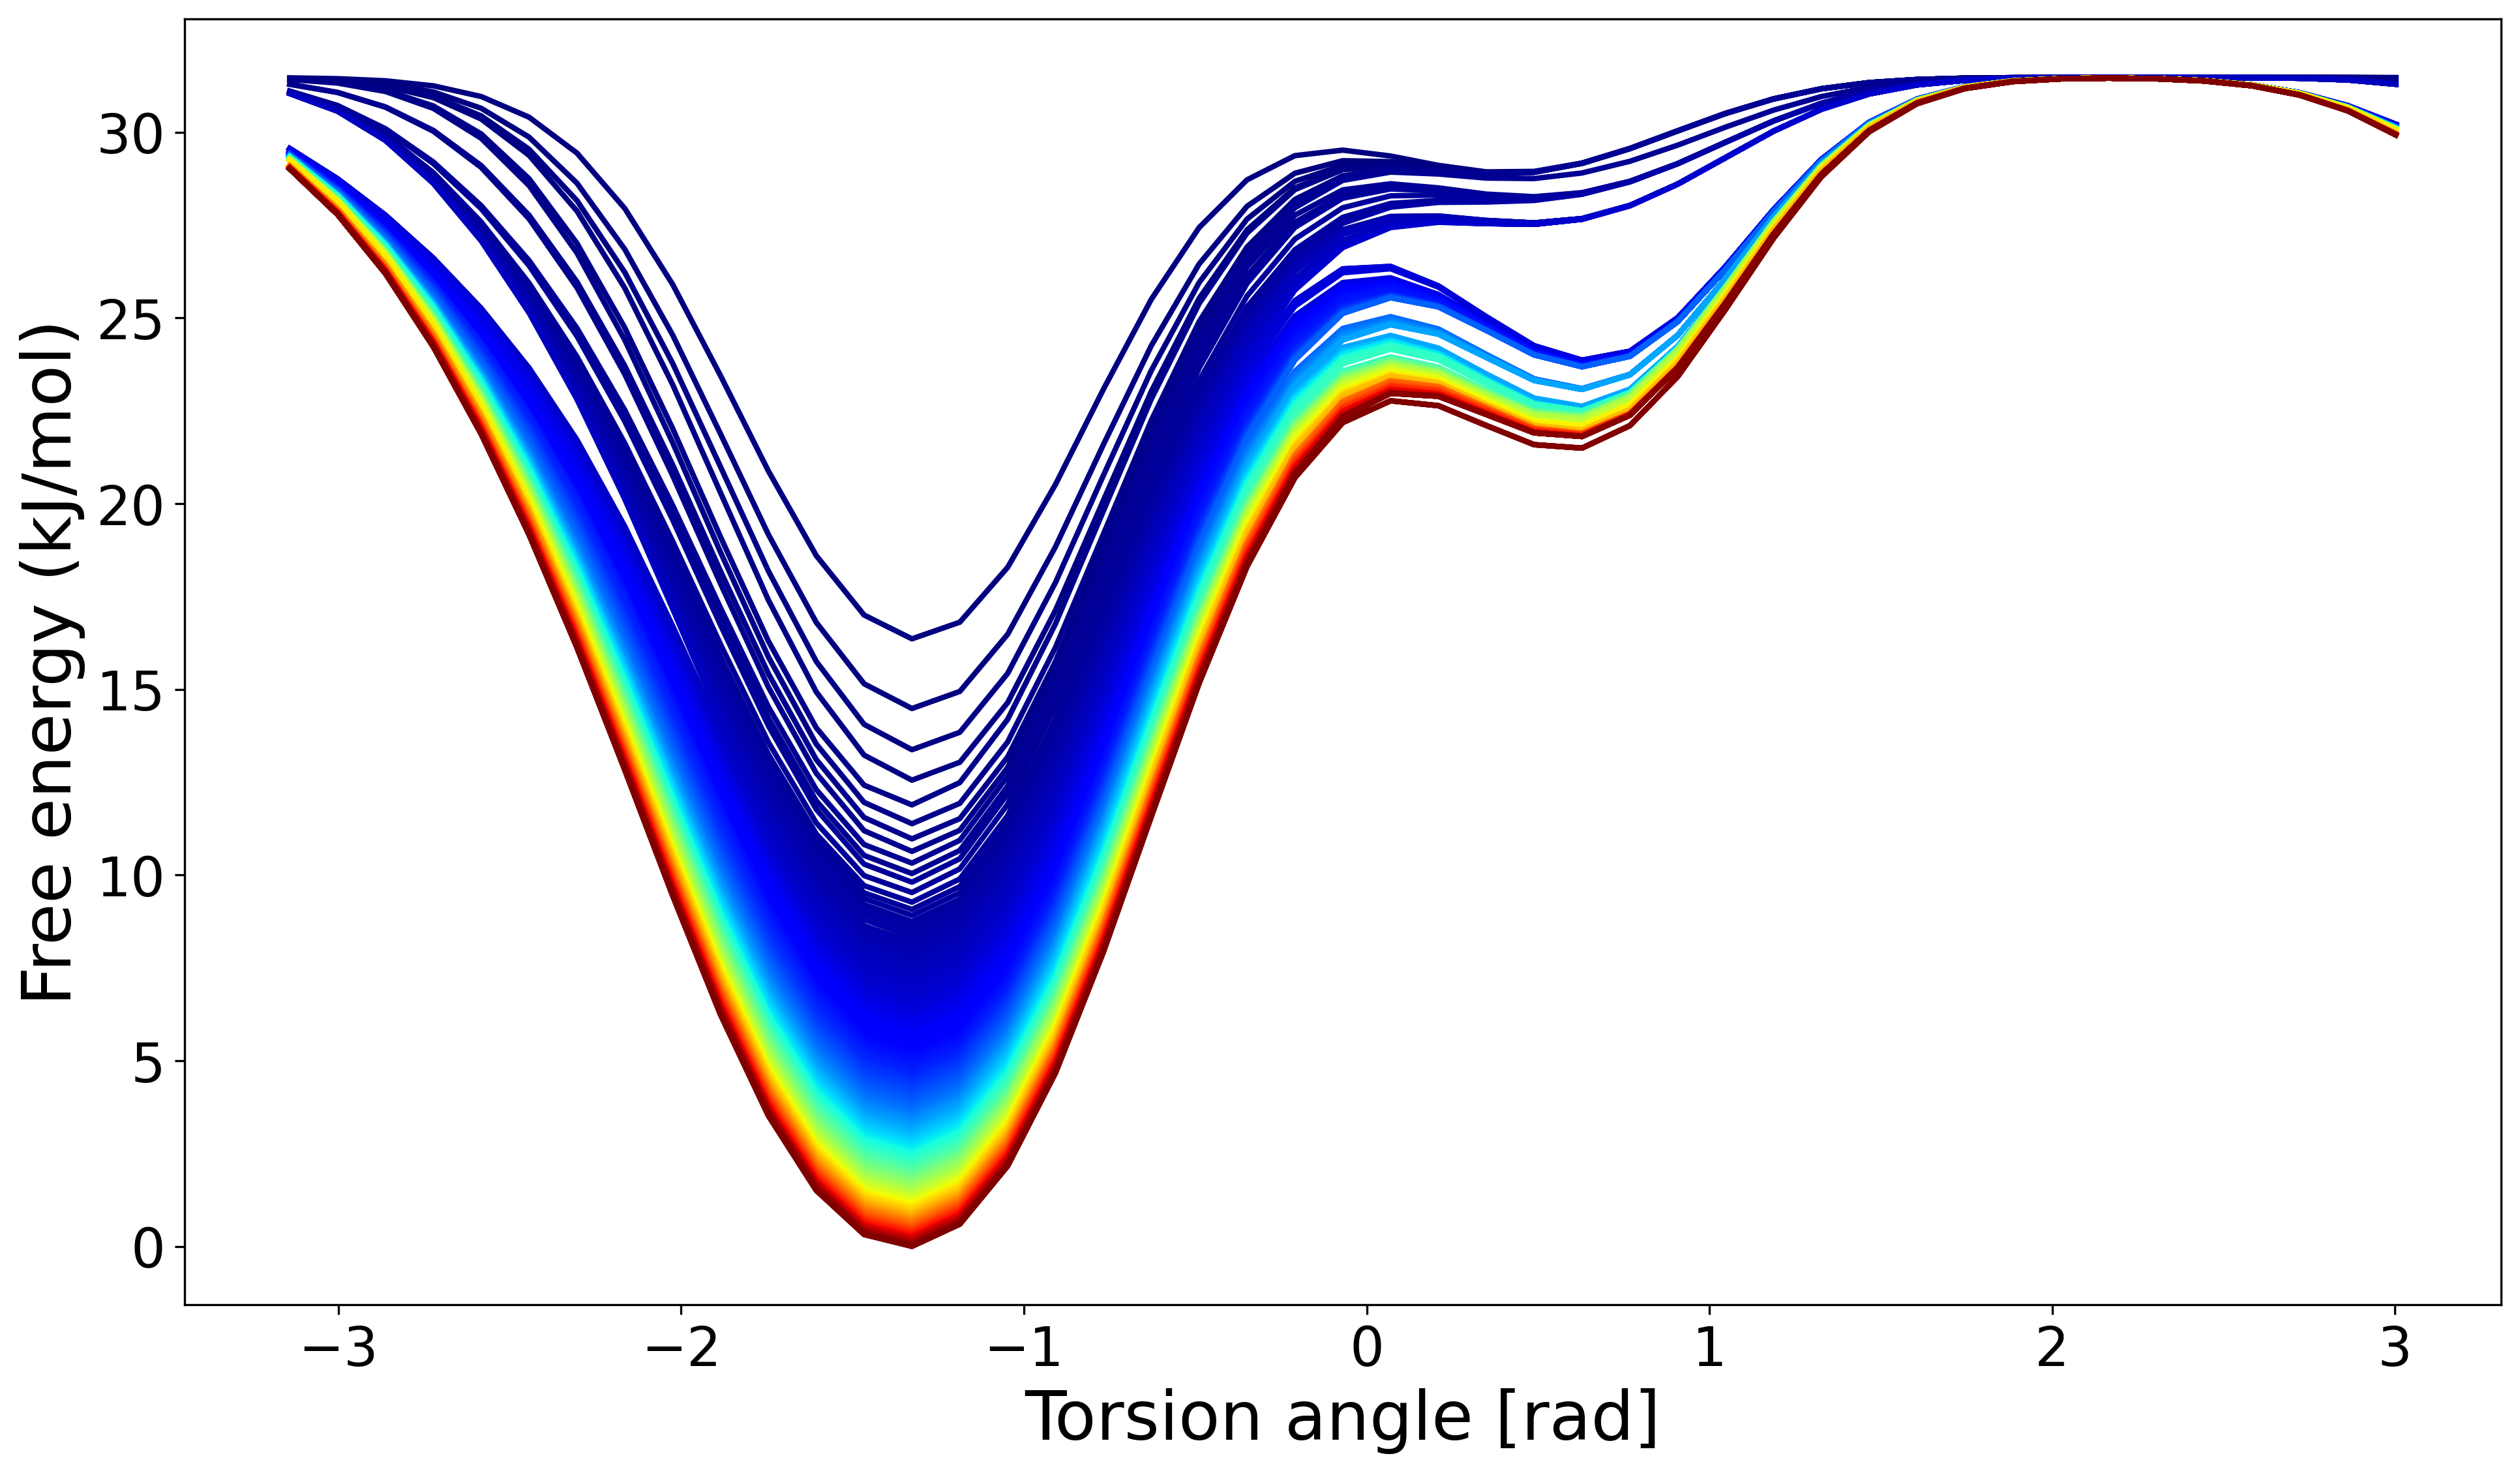

In [5]:
path = "Example_dataset/TOPO0/HILLS_phi1_2.0_fes/"
packages.plot.free_energy(path)

## 5. Plot 2D free energy profile along pucker coordinates phi and theta

/home/grothaus-2/Documents/Simulations/Sugar/models/Github-upload/packages/plot.py:112: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(Y, X, Z, cmap=plt.cm.jet, vmin = 0, vmax = 40)


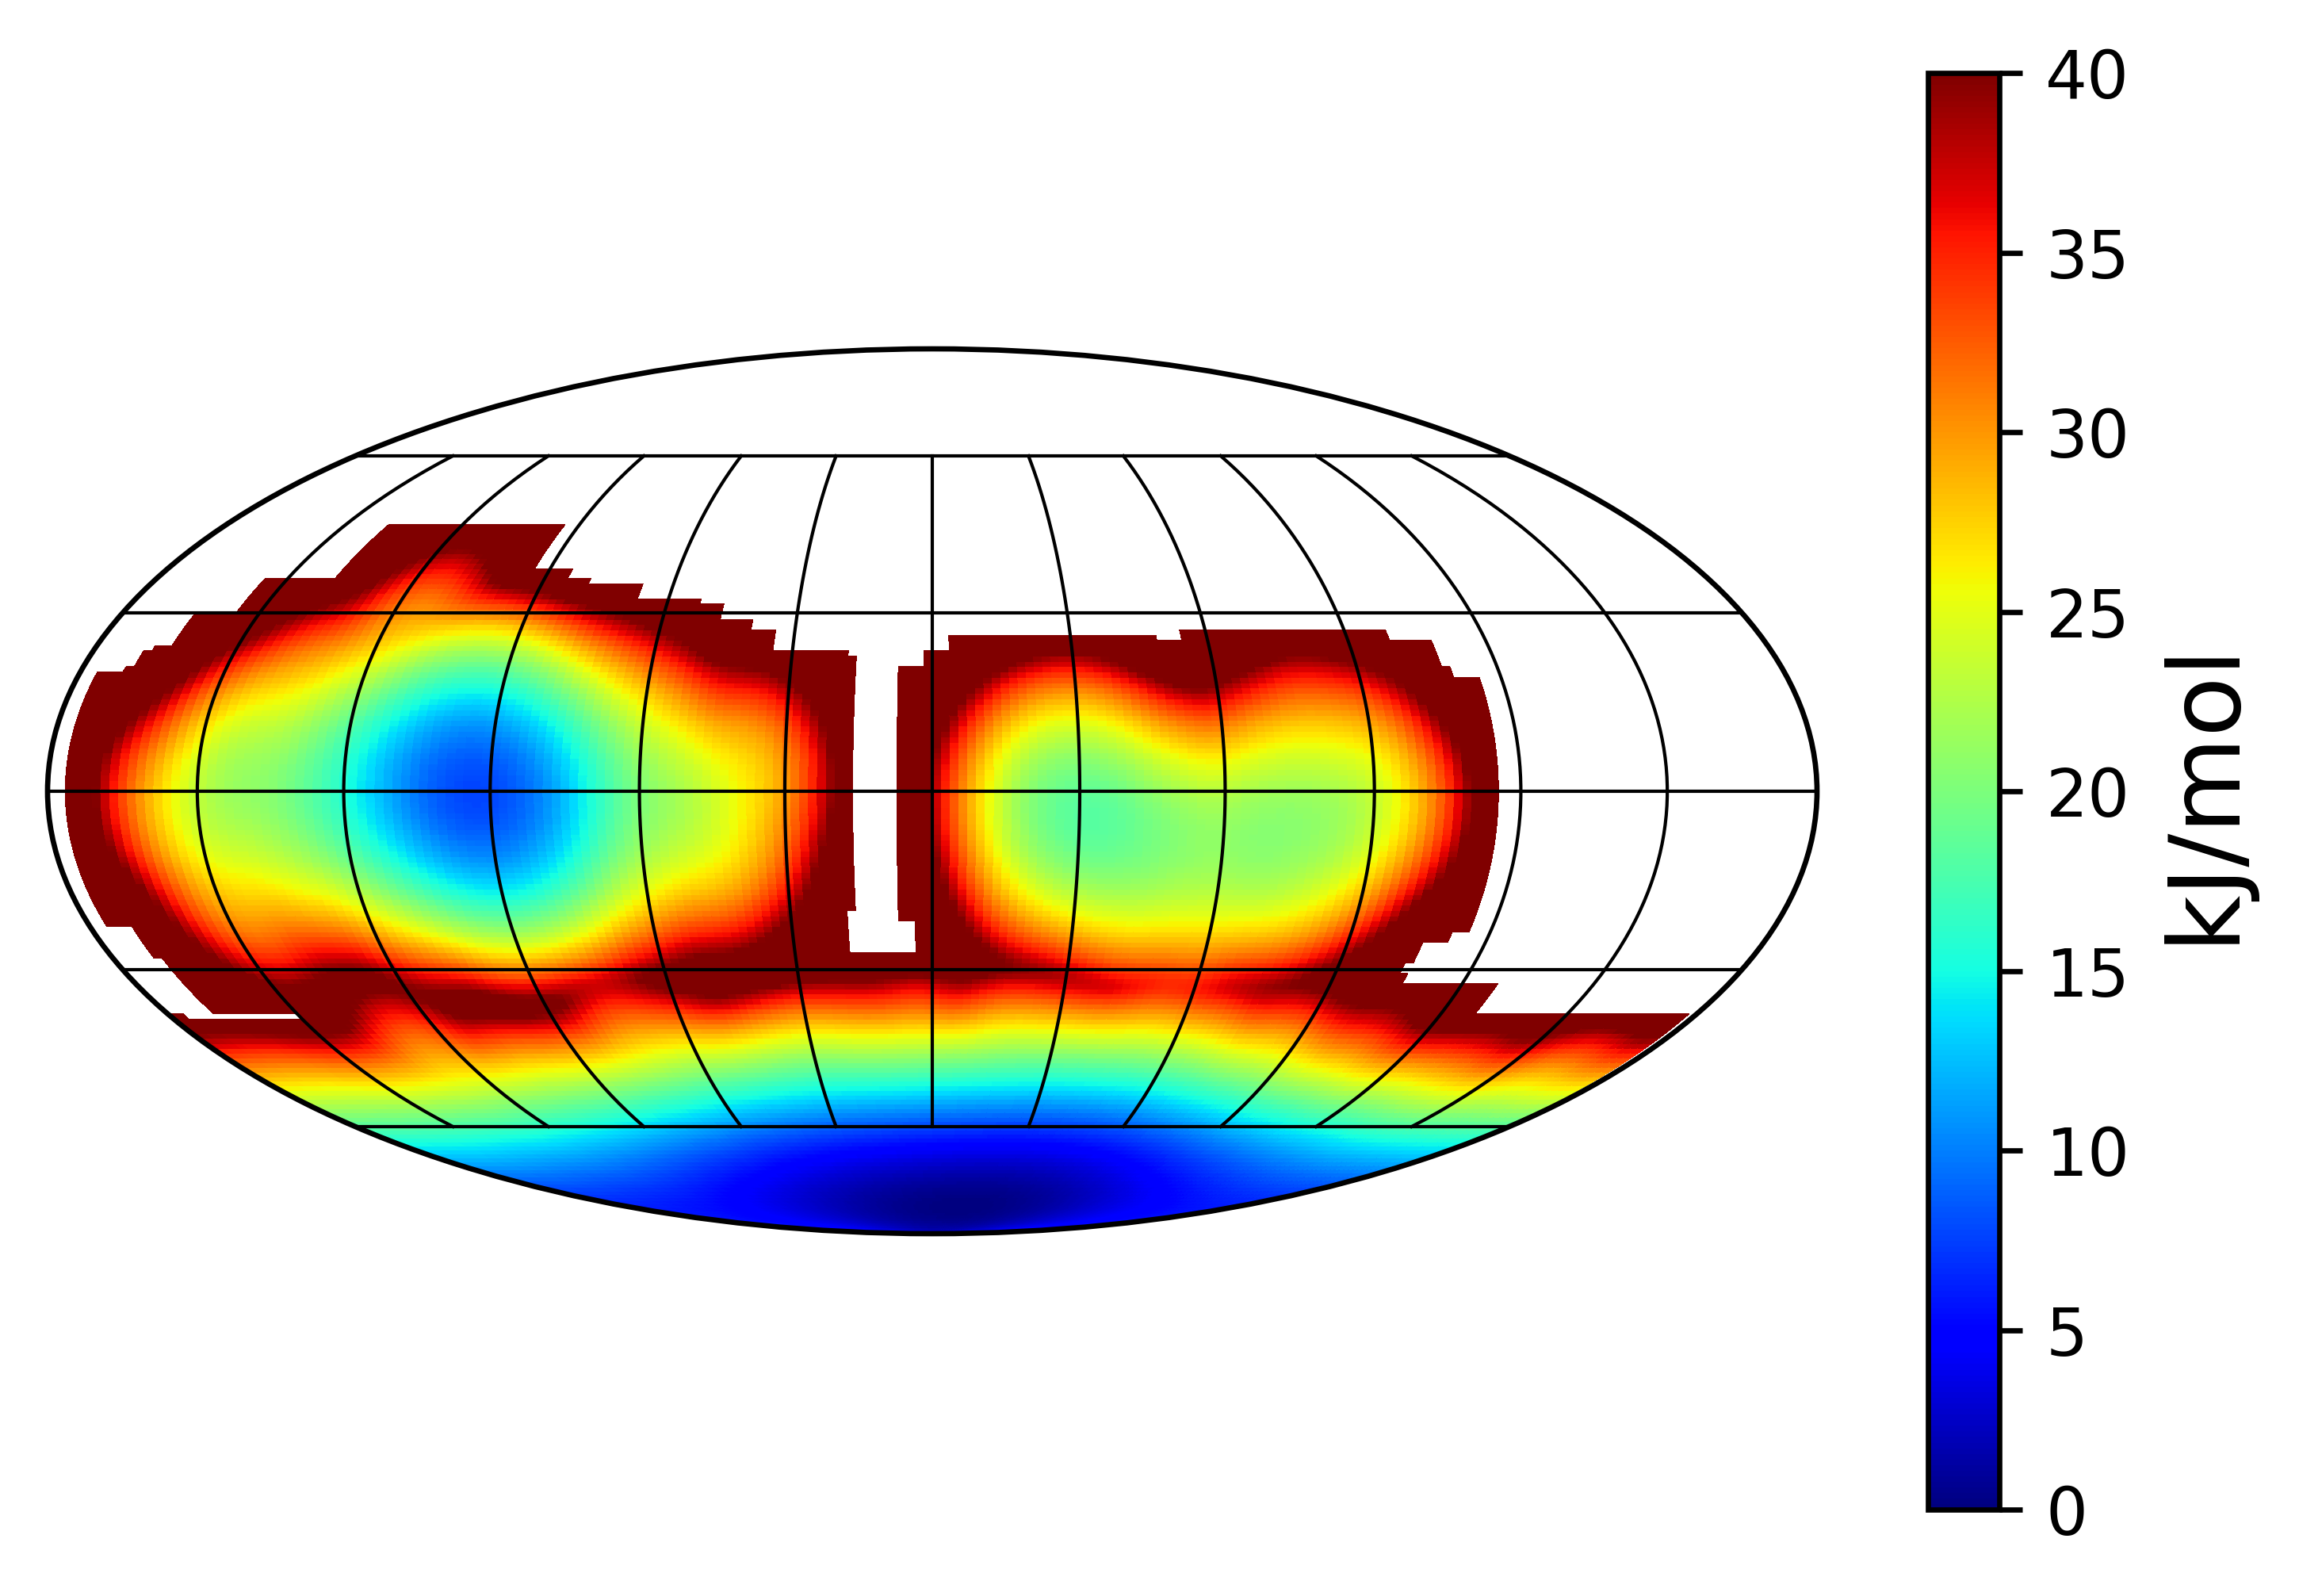

In [6]:
path = "Example_dataset/TOPO0/FEP_pucker"
file = "ffpucker2.dat"
shape = [200,201]

packages.plot.twodim_pucker(path, file, shape)

## 6. Construct and plot conformer string 

In [2]:
features = ['phi1_2', 'psi1_2', 'phi2_3', 'psi2_3', 'phi3_8', 'psi3_8', 'omega3_8','phi8_9', 'psi8_9', 
            'phi9_10', 'psi9_10', 'phi10_11', 'psi10_11', 'omega10_11','phi3_4','psi3_4','phi4_5',
            'psi4_5', 'phi5_6', 'psi5_6', 'phi6_7', 'psi6_7', 'omega6_7']

In [8]:
!mkdir Example_dataset/TOPO0/Conformer_population
for f in features :  
    !cp Example_dataset/TOPO0/HILLS_{f}.0_fes/fes_00500.dat Example_dataset/TOPO0/Conformer_population/fes_{f}.dat

mkdir: cannot create directory ‘Example_dataset/TOPO0/Conformer_population’: File exists


/home/grothaus-2/Documents/Simulations/Sugar/models/Github-upload/packages/glycan_conformer.py:288: UserWarning: cannot load PLUMED instance, conversions will not be available
  colvar = plumed.read_as_pandas(colvar_dir)
/home/grothaus-2/Documents/Simulations/Sugar/models/Github-upload/packages/glycan_conformer.py:292: UserWarning: cannot load PLUMED instance, conversions will not be available
  c = plumed.read_as_pandas(colvar_dir)


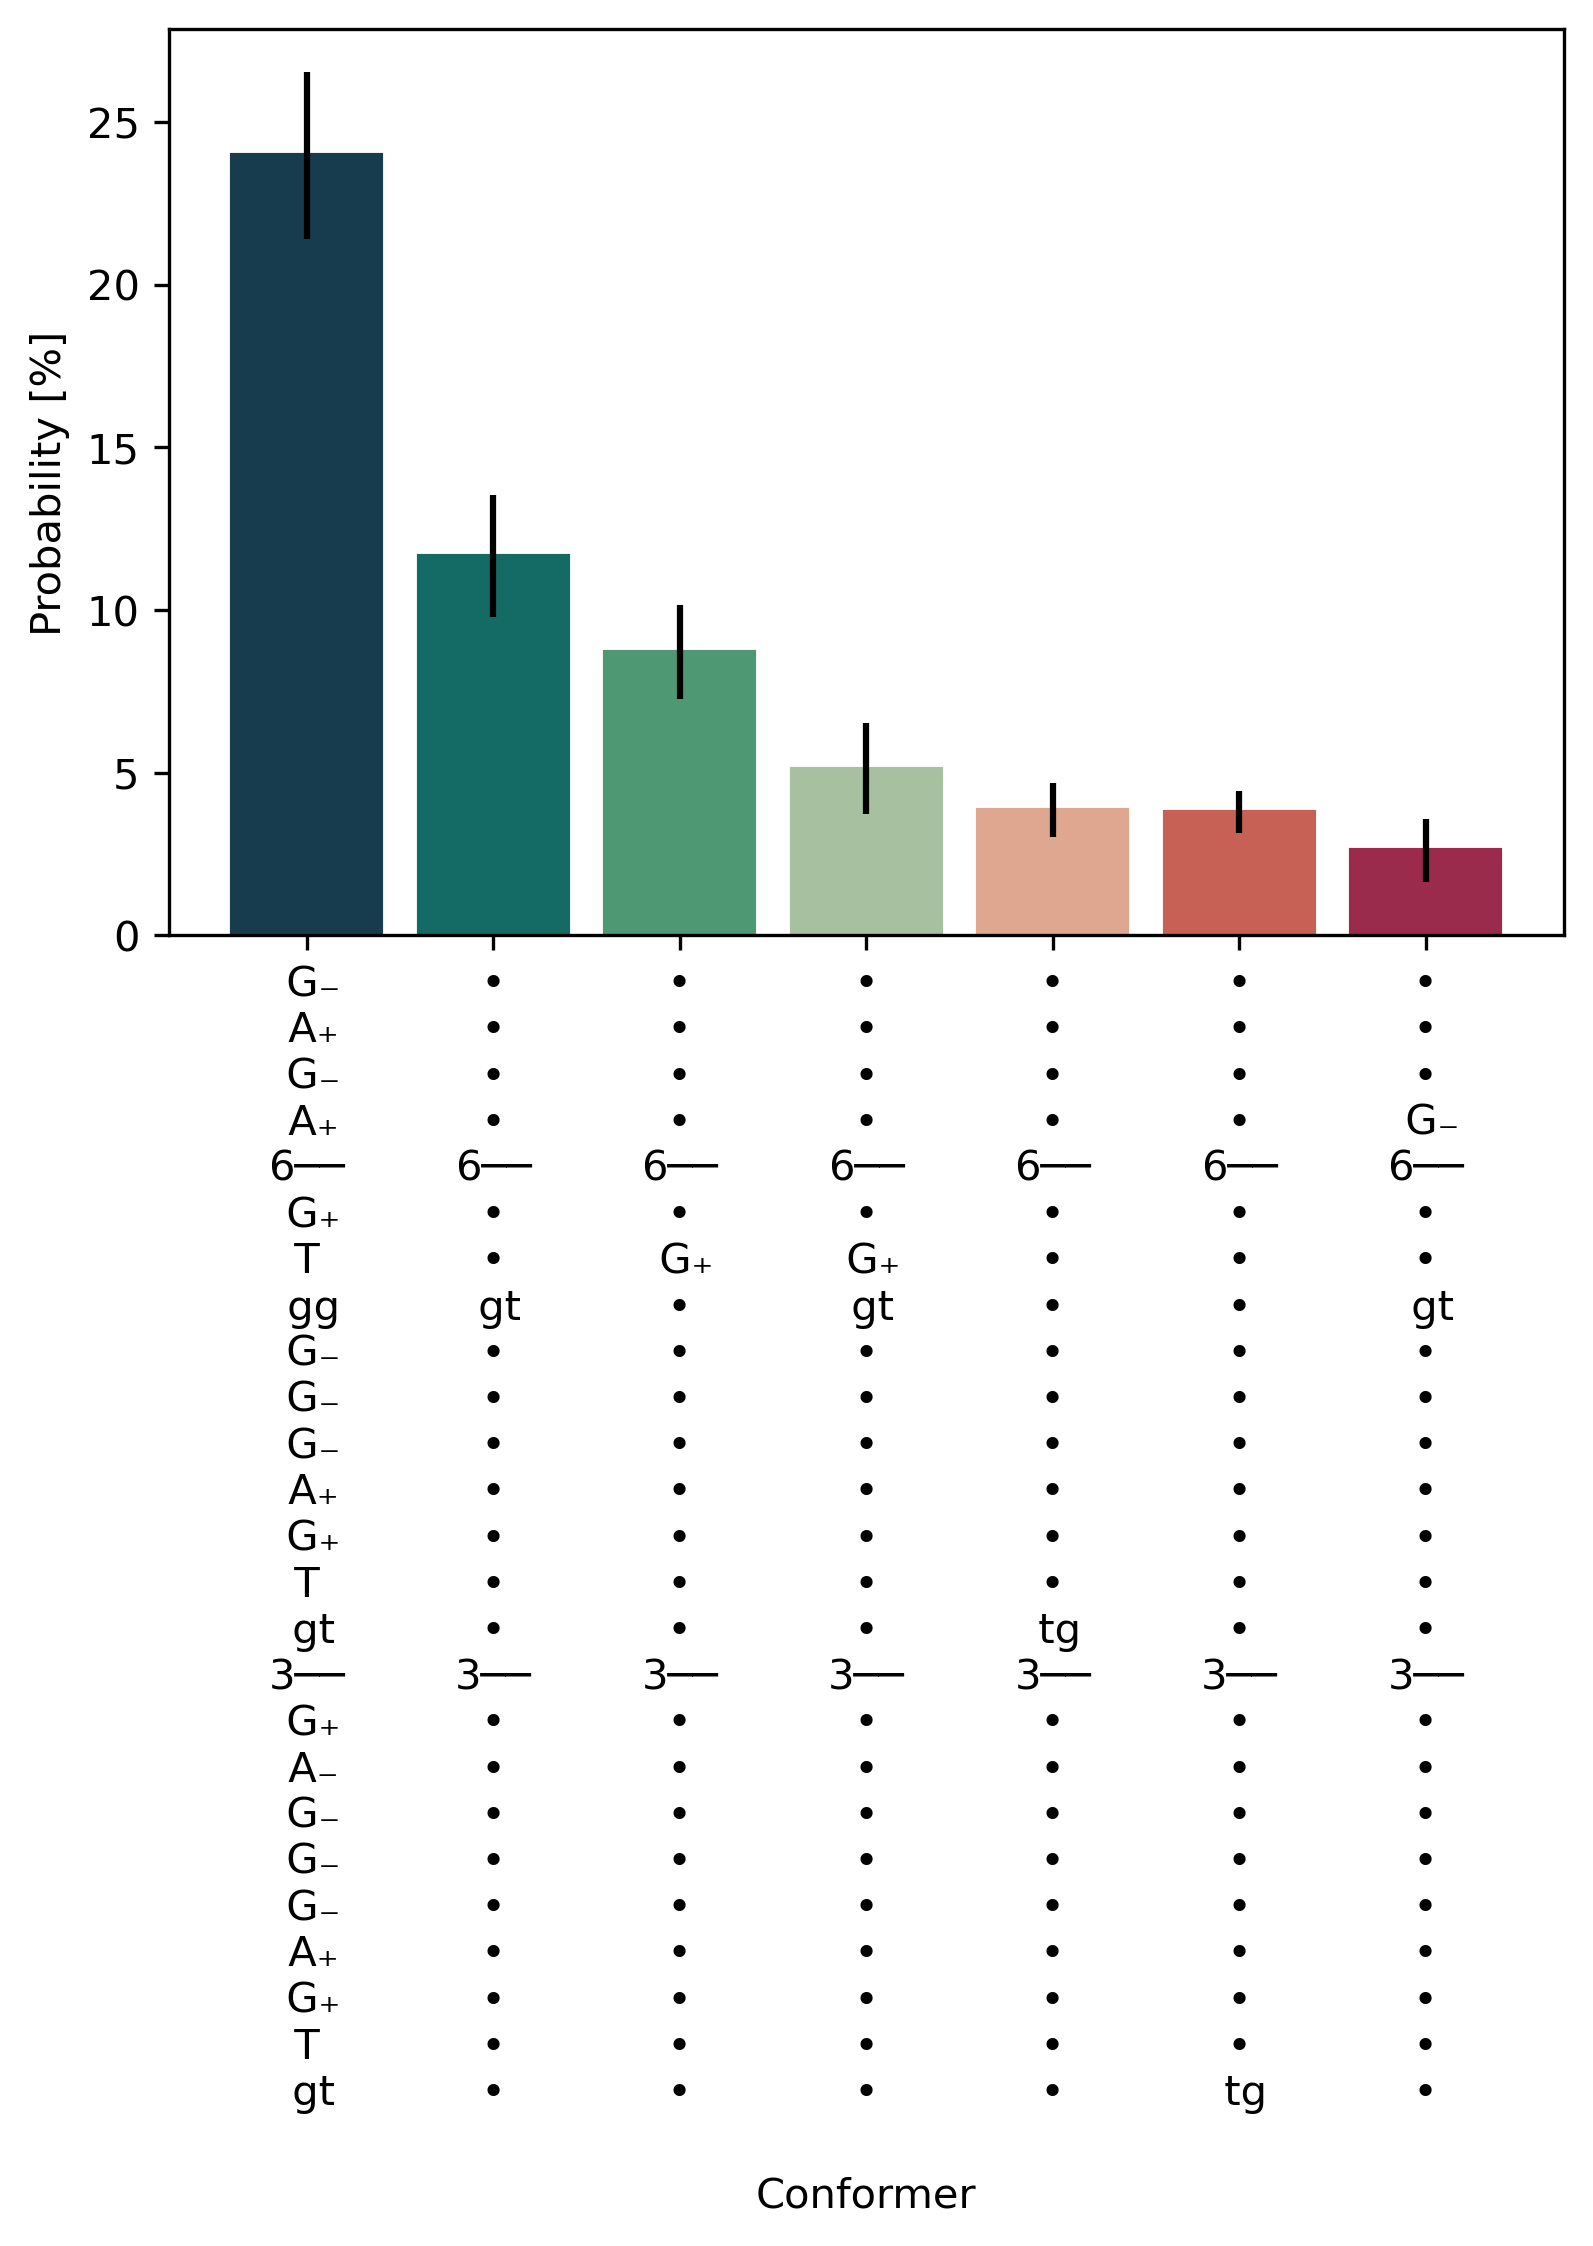

In [3]:
input_dir = "Example_dataset/TOPO0/Conformer_population"
colvar_dir = "Example_dataset/TOPO0/COLVAR.0"
colvar_length = 62501
f_omega = ['omega3_8', 'omega10_11', 'omega6_7']
limit = 0.025
glycantype = "complex"
loc1 = 4 #1-6
loc2 = 14 #1-3

maxima_dict, minima_dict = packages.glycan_conformer.find_min_max(input_dir, features, 5, 5)
label_dict = packages.glycan_conformer.label_min(minima_dict, features, f_omega)

packages.glycan_conformer.safe_dict(maxima_dict, "Example_dataset/TOPO0/Conformer_population/maxima.txt")
packages.glycan_conformer.safe_dict(minima_dict, "Example_dataset/TOPO0/Conformer_population/minima.txt")
packages.glycan_conformer.safe_dict(label_dict, "Example_dataset/TOPO0/Conformer_population/label.txt")

c_binary, c_conformer, features, branches = packages.glycan_conformer.create_binary(maxima_dict, label_dict, 
                                                                                    colvar_dir, input_dir, colvar_length, features, 
                                                                                    loc1, loc2)
packages.glycan_conformer.perform_block_averages(c_binary,c_conformer,input_dir)
packages.glycan_conformer.plot_distribution(input_dir, limit, branches, features)

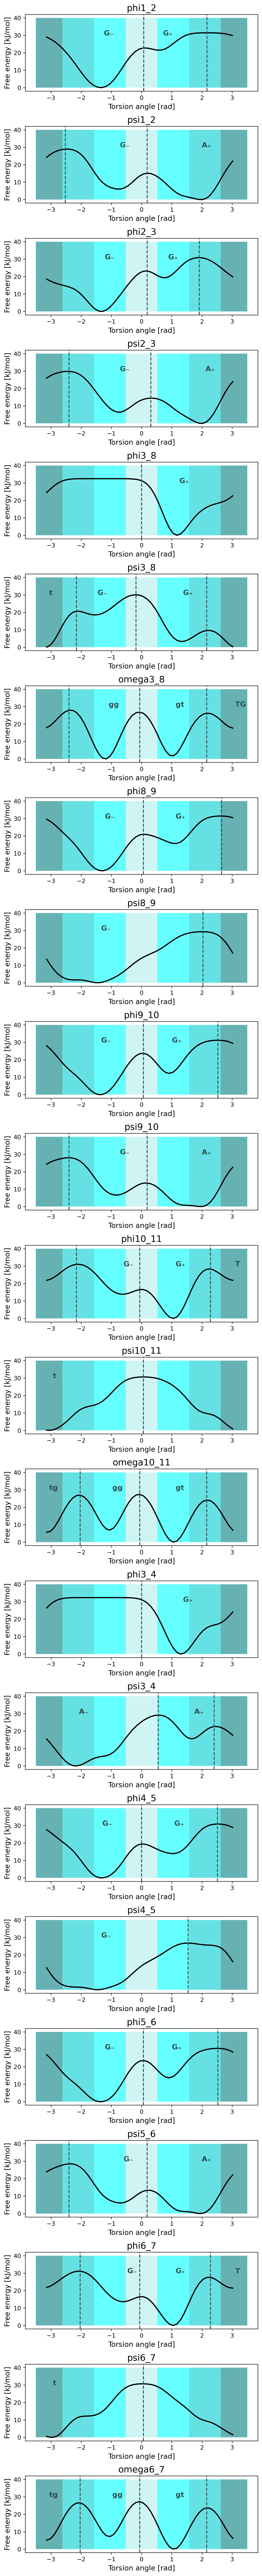

In [4]:
features = ['phi1_2', 'psi1_2', 'phi2_3', 'psi2_3', 'phi3_8', 'psi3_8', 'omega3_8','phi8_9', 'psi8_9', 'phi9_10', 'psi9_10', 'phi10_11', 'psi10_11', 'omega10_11','phi3_4','psi3_4','phi4_5', 'psi4_5', 'phi5_6', 'psi5_6', 'phi6_7', 'psi6_7', 'omega6_7']
packages.plot.graph_eval(input_dir, features, maxima_dict, minima_dict, label_dict)

## 7. Plot convergence plots 

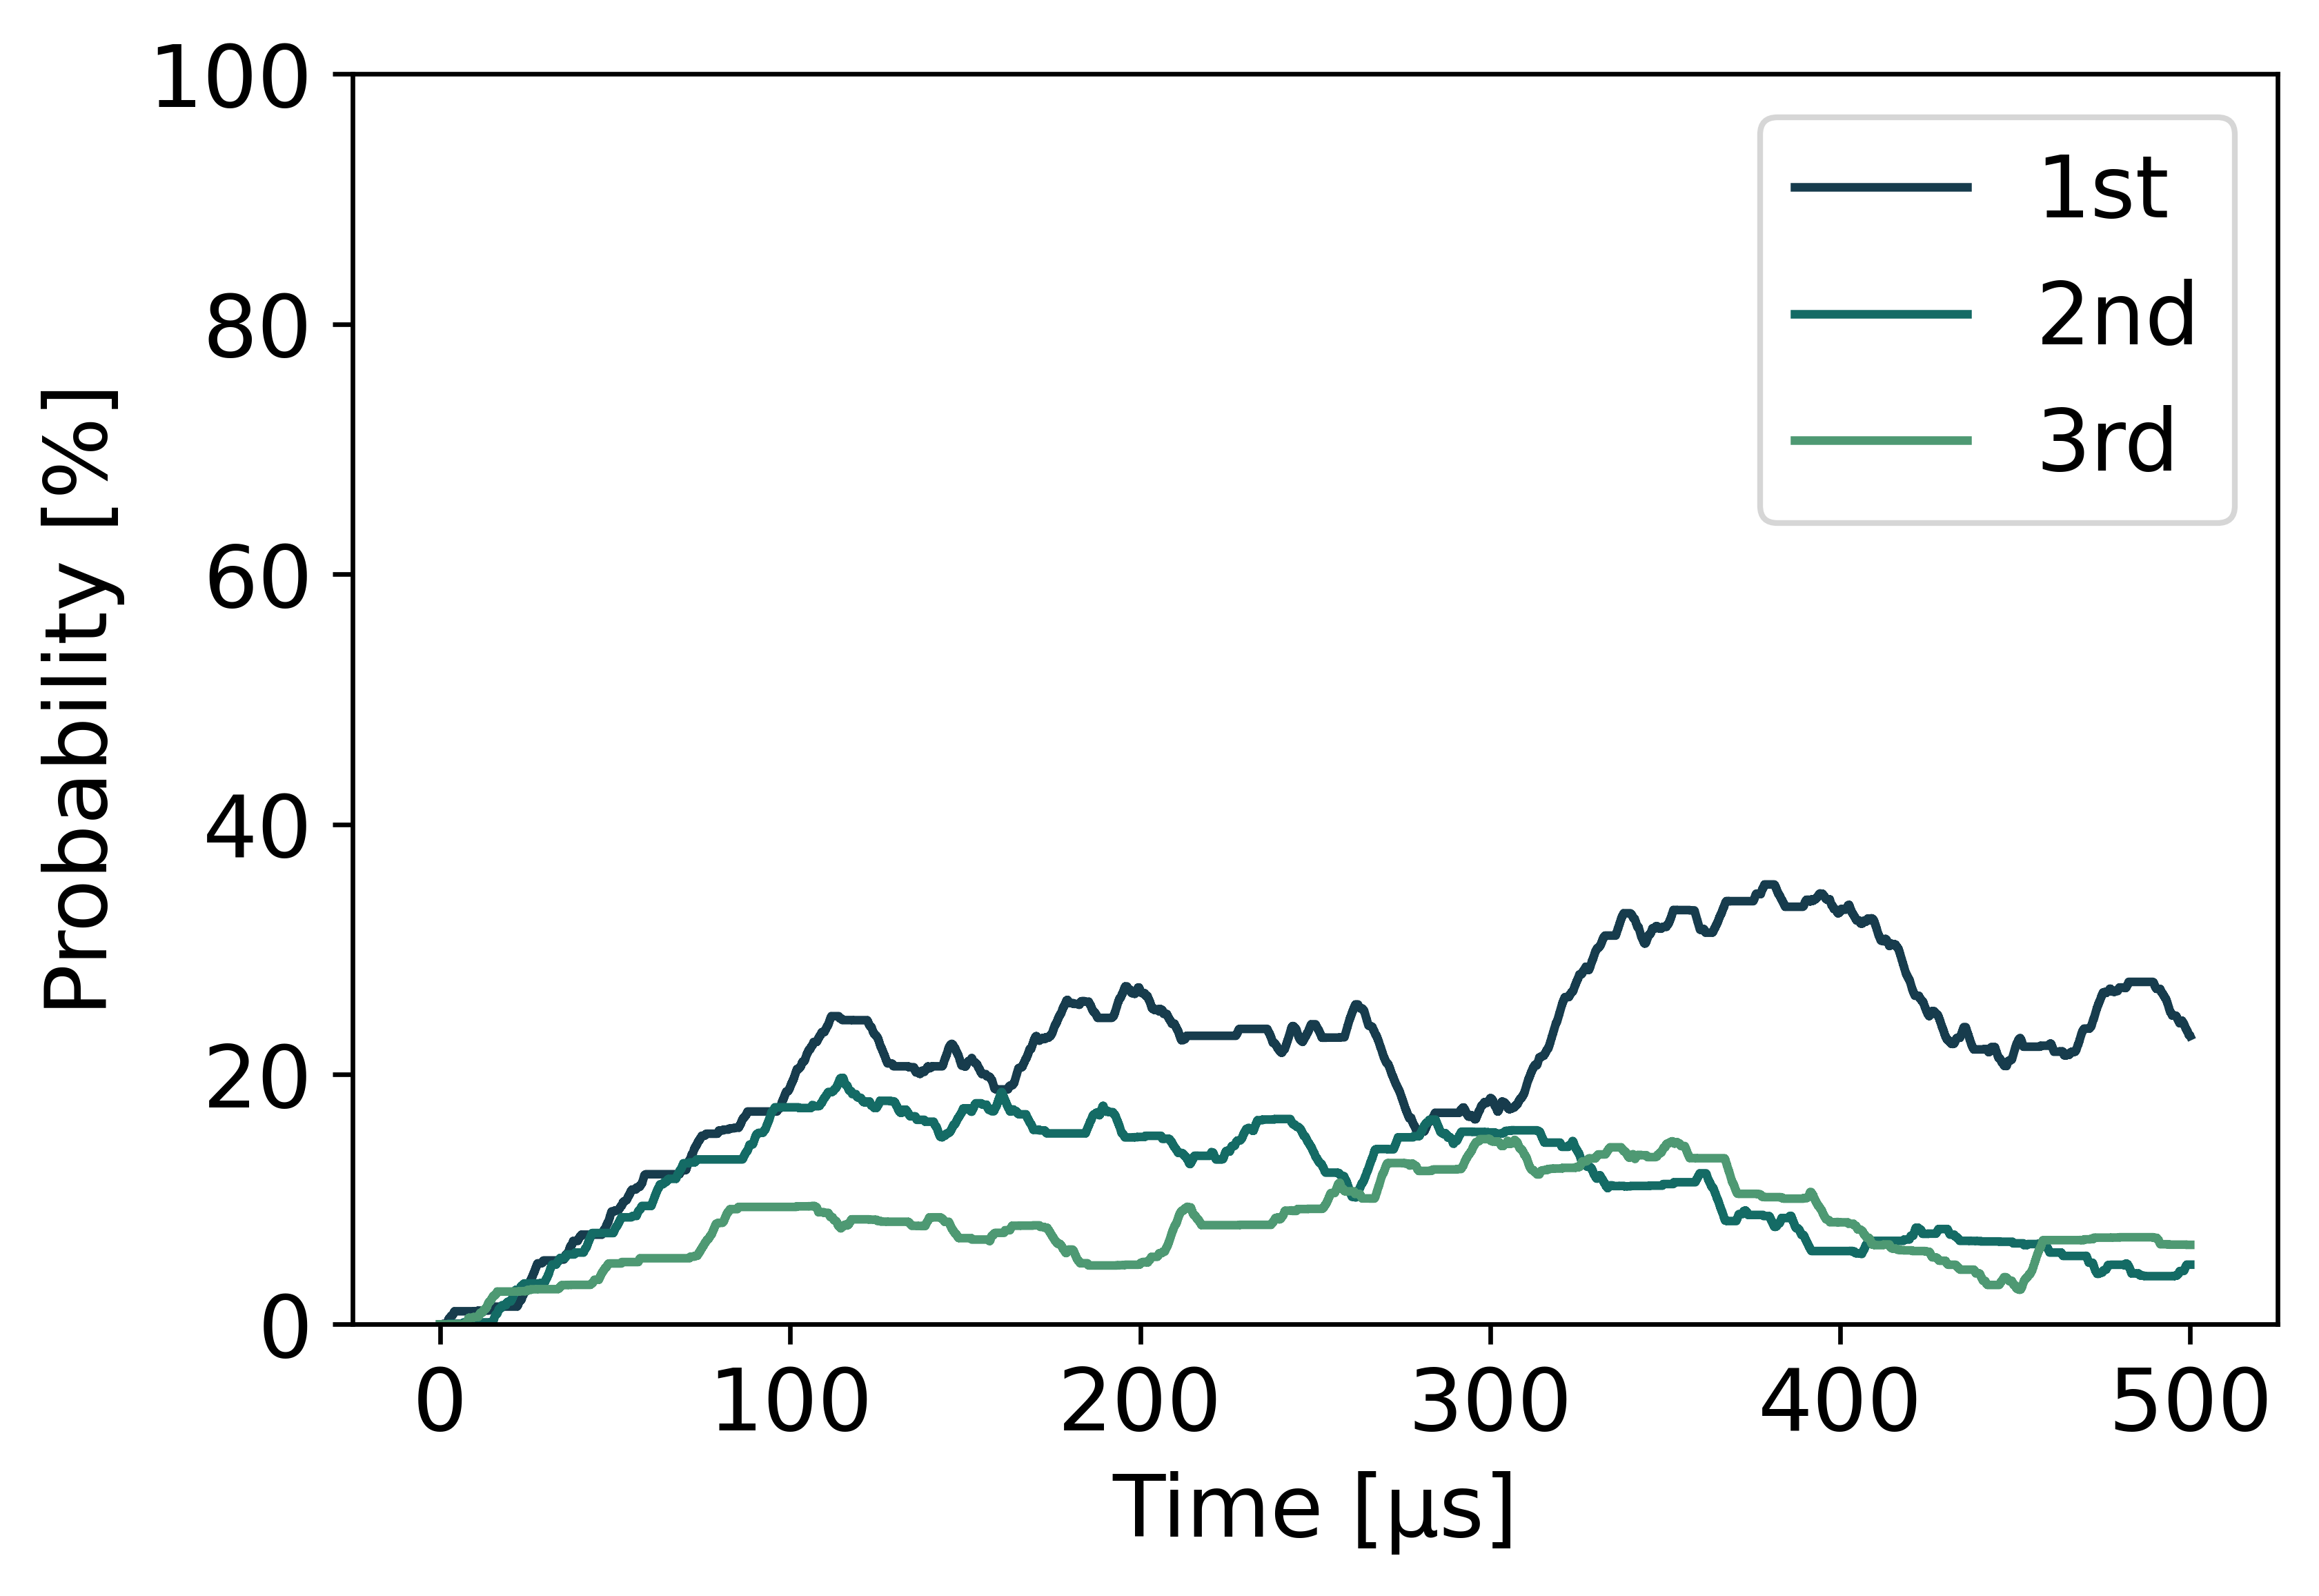

In [5]:
window = 12500
binary = "Example_dataset/TOPO0/Conformer_population/COLVAR_binary"

packages.plot.convergence(binary,window)